In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


**The data comes from here: https://data.cityofnewyork.us/City-Government/Property-Valuation-and-Assessment-Data/yjxr-fw8i**

Understanding the BBL: https://www.pincusco.com/data-dictionary/bbl-also-known-as-borough-block-and-lot-or-property-id/

**Here we read the validation data as a pandas dataframe:**

In [67]:
# data = pd.read_csv('Property_Valuation_and_Assessment_Data.csv')

/Users/pgladkevich/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Column headings and data preview:**

In [68]:
# data.to_pickle('assessment_og.pkl')

In [52]:
data = pd.read_pickle('/Users/pgladkevich/notebooks/DS_1001/assessment_og.pkl')

In [53]:
pd.options.display.max_columns = None
display(data)
#NTA = Neighberhood tabulation area

,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,POSTCODE,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,New Georeferenced Column
0,1010401210,1,1040,1210,NaN,"H&G WARNER, LLC",R4,2,0,0,NaN,35.0,113465,12707,51059,0,0,NaN,350 WEST 50 STREET,10019.0,NaN,200,327,12707.0,47727.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.762988,-73.987791,104.0,3.0,127.0,1077841.0,Clinton,POINT (-73.987791 40.762988)
1,1008901282,1,890,1282,NaN,"SPERBER, LORRAINE",R4,2,0,0,NaN,19.0,135599,11877,61020,0,0,NaN,155 EAST 34 STREET,10016.0,NaN,0,0,11877.0,53712.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.746162,-73.979129,106.0,2.0,72.0,1018549.0,Murray Hill-Kips Bay,POINT (-73.979129 40.746162)
2,1009681288,1,968,1288,NaN,ROOS ESTHER A,R4,2,0,0,NaN,37.0,222481,39824,100116,2090,2090,1017.0,630 1 AVENUE,10016.0,NaN,0,0,39824.0,96085.0,2090.0,2090.0,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.745156,-73.972500,106.0,4.0,8601.0,1022060.0,Turtle Bay-East Midtown,POINT (-73.9725 40.745156)
3,1008701611,1,870,1611,NaN,BARRETO ANITA,R4,2,244,425,NaN,27.0,172555,21306,77650,0,0,NaN,1 IRVING PLACE,10003.0,NaN,0,0,21306.0,75826.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.734072,-73.988713,105.0,2.0,50.0,1083247.0,Gramercy,POINT (-73.988713 40.734072)
4,1010381112,1,1038,1112,NaN,NaN,R4,2,0,0,NaN,43.0,175784,4698,79103,1270,75675,5110.0,306 WEST 48 STREET,10036.0,NaN,23,100,4120.0,79714.0,692.0,76286.0,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.761262,-73.987572,104.0,3.0,127.0,1087980.0,Clinton,POINT (-73.987572 40.761262)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845852,1007650020,1,765,20,NaN,EVGER 15TH STREET REA,C4,2,25,103,NaN,5.0,782000,99900,351900,0,0,NaN,229 WEST 15 STREET,10011.0,NaN,25,92,99900.0,324000.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.739672,-74.000173,104.0,3.0,81.0,1013768.0,Hudson Yards-Chelsea-Flatiron-Union Square,POINT (-74.000173 40.739672)
9845853,1008690024,1,869,24,NaN,PARSONAGE HILL VILL.A,O1,4,35,100,E,5.0,3410000,1237500,1534500,0,0,NaN,263 MADISON AVENUE,10016.0,NaN,35,100,1237500.0,1532700.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.750993,-73.980597,106.0,4.0,82.0,1017591.0,Murray Hill-Kips Bay,POINT (-73.980597 40.750993)
9845854,1007640075,1,764,75,NaN,92 EIGHTH AVENUE REAL,C4,2B,25,93,NaN,4.0,3340000,127622,448692,0,0,NaN,92 8 AVENUE,10011.0,NaN,26,55,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.740141,-74.002227,104.0,3.0,81.0,1000000.0,Hudson Yards-Chelsea-Flatiron-Union Square,POINT (-74.002227 40.740141)
9845855,1006260047,1,626,47,NaN,HEALY DONALL B,S4,2A,24,88,NaN,4.0,6460000,178647,309400,0,0,NaN,35 JANE STREET,10014.0,NaN,25,40,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,MANHATTAN,40.738143,-74.004471,102.0,3.0,77.0,1077100.0,West Village,POINT (-74.004471 40.738143)


In [54]:
sorteddf = data.sort_values(["BORO","BLOCK","LOT"], ascending = (False, False,False))

In [55]:
sorteddf = sorteddf[sorteddf['EASEMENT'].fillna(value=False) != False]
building_class_vals = sorteddf.BLDGCL.unique()
building_class_vals.sort()
print(building_class_vals)

['A2' 'B1' 'D1' 'G0' 'G1' 'G6' 'G7' 'K1' 'Q1' 'R5' 'T2' 'T9' 'U1' 'U2'
 'U4' 'U5' 'U6' 'U7' 'U8' 'U9' 'V0' 'V1' 'V3' 'V4' 'V7' 'V8' 'V9' 'Y8'
 'Y9' 'Z2' 'Z6' 'Z7' 'Z9']


In [56]:
sorteddf[(sorteddf["BLDGCL"] == 'A2') |  (sorteddf["BLDGCL"] == 'B1') | (sorteddf["BLDGCL"] == 'D1')].shape

(11, 40)

**Plotting some features to see if there are any outliers:**

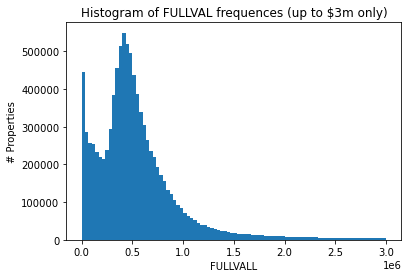

In [57]:
plt.hist(data['FULLVAL'], bins=90,range=(0,3000000))
plt.ylabel('# Properties')
plt.xlabel('FULLVALL')
plt.title('Histogram of FULLVAL frequences (up to $3m only)')
plt.show()

**Comment:** Clearly there are many properties going for a very low amount - potentially we need to remove these from the analysis. I have limited this to properties up to \$USD 3m - the tail end of the distribution is **extremely** long. The most expensive property in the data is worth almost $8bn:

In [58]:
print('The most expensive property in the data is valued at ${:,.2f}'.format(np.max(data2['FULLVAL'])))

NameError: name 'data2' is not defined

In [ ]:
plt.plot(data['Borough'].value_counts())
plt.ylabel('# Properties')
plt.xlabel('Borough')
plt.title('Properties per Borough')
plt.show()

In [ ]:
data.shape

In [ ]:
data[data['Borough'] == 'BRONX'].shape

In [ ]:
929433/9845857

In [ ]:
# data[data['EASEMENT' == np.NAN]].head()
easement = data[data['EASEMENT'].fillna(value=False) != False]
display(easement)

In [ ]:
easement.shape

**Comment:** Makes sense given the relative size of each borough

In [ ]:
plt.hist(data['STORIES'], bins=20,range=(0,60))
plt.ylabel('# Properties')
plt.xlabel('STORIES')
plt.title('Histogram of STORIES frequences (up to 60 only)')
plt.show()

**Comments:** We have 60-floor buildings in the data set - do we want to include skyscrapers in our model? Arguments against:
- There are very few skyscraper sales
- Much harder to predict
- Might throw the model off on normal real estate sales

In [ ]:
plt.scatter(data['Latitude'],data['Longitude'],s=0.001)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**Comments:** We have pretty good lat and long data here - which I think might be superior to street address. Also fun to see a ghost map of NYC when we scatter the data!